In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import LancasterStemmer,WordNetLemmatizer
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.layers import Dense
from keras.models import Sequential
import spacy
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from transformers import BertTokenizer, TFBertForSequenceClassification
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc


#### 3.3 Now try BERT model

BERT(Bidirectional Encoder Representations from Transformers): One of the state-of-the-art models for NLP tasks. Fine-tune a pre-trained BERT model for text classification.
Loading this pre-trained model, which has been trained on a large corpus (like Wikipedia and BookCorpus). Then fine-tune this model on this dataset

In [4]:
from transformers import 2w, DistilBertTokenizer

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')


/Users/lixiaohua/anaconda3/envs/myenv/lib/python3.10/site-packages/huggingface_hub/file_download.py:1150: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertModel: ['vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_transform.bias', 'vocab_layer_norm.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFDistilBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertModel for predictions without further training.


In [6]:
data_concat_t = pd.read_csv('data_concat_t.csv')
data_concat_t.head(3)

,telecommuting,has_company_logo,has_questions,employment_type_Full-time,employment_type_None,employment_type_Other,employment_type_Part-time,employment_type_Temporary,required_experience_Director,required_experience_Entry level,required_experience_Executive,required_experience_Internship,required_experience_Mid-Senior level,required_experience_None,required_experience_Not Applicable,cleaned_text4,fraudulent
0,False,True,False,False,False,True,False,False,False,False,False,True,False,False,False,marketing intern were weve create groundbreaki...,0
1,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,customer service cloud video production second...,0
2,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,commissioning machinery assistant cma valor se...,0


In [46]:
data_concat_t.isnull().sum()

telecommuting                           0
has_company_logo                        0
has_questions                           0
employment_type_Full-time               0
employment_type_None                    0
employment_type_Other                   0
employment_type_Part-time               0
employment_type_Temporary               0
required_experience_Director            0
required_experience_Entry level         0
required_experience_Executive           0
required_experience_Internship          0
required_experience_Mid-Senior level    0
required_experience_None                0
required_experience_Not Applicable      0
cleaned_text4                           0
fraudulent                              0
dtype: int64

In [8]:
X = data_concat_t.drop('fraudulent', axis=1)
y = data_concat_t['fraudulent']

In [37]:
%%time
# Tokenization
# tokenized = X_train['cleaned_text4'].apply((lambda x: tokenizer.encode(x, max_length = 30, truncation=True, add_special_tokens=True)))
# tokenized.shape

X_tokenized = tokenizer(
    list(X['cleaned_text4']),  # Convert Series to list
    padding=True, 
    truncation=True, 
    max_length=30, 
    return_tensors="tf"  # Return as TensorFlow tensors
)

CPU times: user 49.3 s, sys: 48.7 ms, total: 49.3 s
Wall time: 49.3 s


In [38]:
X_tokenized

{'input_ids': <tf.Tensor: shape=(17880, 30), dtype=int32, numpy=
array([[  101,  5821, 25204, ...,  3330,  2136,   102],
       [  101,  8013,  2326, ...,  3965,  5973,   102],
       [  101, 21612, 10394, ...,  2296,  3357,   102],
       ...,
       [  101,  2622,  3465, ...,  2152,  3737,   102],
       [  101,  8425,  5859, ...,  2640,  3305,   102],
       [  101,  4773,  4646, ...,  9130,  5799,   102]], dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(17880, 30), dtype=int32, numpy=
array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=int32)>}

In [19]:
# # No need to fine tune the BERT model in here. Ignore below.
# Padding ==> convert 1D array to 2D array
# max_len = 0
# for i in tokenized.values:
#     if len(i) > max_len:
#         max_len = len(i)

# padded = np.array([i + [0]*(max_len-len(i)) for i in tokenized.values])
# np.array(padded).shape

In [27]:
# Masking ==>  ignore (mask) the padding we've added
# attention_mask = np.where(padded != 0, 1, 0)
# attention_mask.shape

#### Fit the tokens into the model
Get the last hidden state

In [40]:
bert_output = model(X_tokenized).last_hidden_state

In [41]:
bert_output

<tf.Tensor: shape=(17880, 30, 768), dtype=float32, numpy=
array([[[-0.05980423, -0.02481304,  0.00910424, ..., -0.33117932,
          0.30045524,  0.03914884],
        [ 0.06630781, -0.00888567,  0.06987807, ..., -0.47503838,
          0.31529167, -0.06729171],
        [-0.17012228,  0.26836365,  0.1909812 , ..., -0.3302111 ,
         -0.11224712, -0.6104045 ],
        ...,
        [ 0.16461964,  0.24189208,  0.11887303, ..., -0.5333072 ,
         -0.06250383, -0.13088709],
        [-0.12968767,  0.00756082,  0.0122868 , ..., -0.16320962,
          0.0041973 , -0.5646109 ],
        [ 0.6913022 ,  0.22335252, -0.37156796, ..., -0.26613367,
         -0.50906515, -0.37464538]],

       [[ 0.24121627, -0.07501496,  0.01432567, ..., -0.6439729 ,
          0.26622033,  0.1586175 ],
        [ 0.18809797,  0.04964391,  0.08794902, ..., -0.07881849,
          0.4446073 , -0.13693361],
        [ 0.39023384,  0.15857726,  0.16035128, ..., -0.3916348 ,
          0.15524144,  0.00128211],
        .

In [49]:
# Perform mean pooling to get a single vector per job post
sentence_embeddings = tf.reduce_mean(bert_output, axis=1)

X_binary_fea = X.drop(columns=['cleaned_text4','tokenized'])
X_binary_fea = X_binary_fea.astype(int)
X_combined = np.concatenate([sentence_embeddings, X_binary_fea], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size = 0.2, random_state = 42)


In [53]:
clf = LogisticRegression(random_state=42, max_iter=1000)
# Fit the classifier using the extracted embeddings
clf.fit(X_train, y_train)
y_preds = clf.predict(X_test)

In [56]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_preds)
precision = precision_score(y_test, y_preds)
recall = recall_score(y_test, y_preds)
f1 = f1_score(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9732
Precision: 0.8295
Recall: 0.5912
F1 Score: 0.6903
ROC-AUC: 0.7923


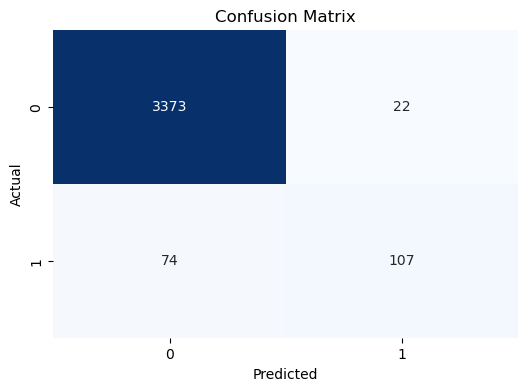

In [57]:
cm = confusion_matrix(y_test, y_preds)

# Plot the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

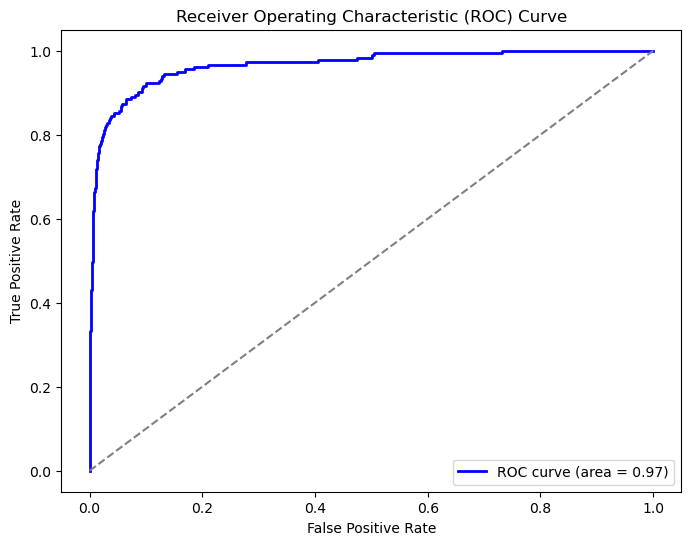

In [65]:
y_preds_proba = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_preds_proba)  # y_preds_proba should be the predicted probabilities
roc_auc = auc(fpr, tpr)

# Plot ROC-AUC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random chance
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
